In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget

In [3]:
import psyplot.project as psy

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from IPython.display import display, Video
import cfgrib

import math

import warnings
warnings.filterwarnings("ignore", r"\s*The on_mappable_changed")
warnings.filterwarnings("ignore", r"\s*The input coordinates")
warnings.filterwarnings("ignore", r"\s*shading=")
warnings.filterwarnings("ignore", r"\s*\[Warning by")
warnings.filterwarnings("ignore", r"\s*ShapelyDeprecationWarning")

# To work with self-written modules, the paths of the modules directories have to be added
from pathlib import Path
import sys
icon_vis_dir = Path.cwd().parent
sys.path.insert(1,str(Path(icon_vis_dir,'data')))
sys.path.insert(1,str(Path(icon_vis_dir,'modules')))
sys.path.insert(1,str(Path(icon_vis_dir,'grid')))

In [4]:
f_vt_vn = 'data/grib/vnvt00010000'
f_vt_vn2= '/scratch/vcherkas/icon-vis/data/example_data/grib/vnvt00010000'
f_vt_vn = '/scratch/cosuna/visualization/newdata/lfff00010000'
f_grid  = '/scratch/vcherkas/icon-vis/data/example_data/grids/icon_grid_0001_R19B08_mch.nc'

#f_vt_vn = 'data/grib/mch_bench_r19b07_dev_atm_3d_ml_20210620T120000Z.grb'

#f_vt_vn = 'data/grib/lfff00000000z_vn'

In [ ]:
dss = cfgrib.open_datasets(f_vt_vn, engine='cfgrib',
                        backend_kwargs={
                            'indexpath': '', 'errors': 'ignore',
                            "read_keys": ["typeOfLevel", "gridType"],
                            "filter_by_keys": {"typeOfLevel": "generalVerticalLayer"},
                        }, encode_cf=("time", "geography", "vertical"))
ds_cell = dss[0]
ds_edge = dss[1]

In [5]:
ds_edge =  psy.open_dataset(f_vt_vn2, engine='cfgrib', backend_kwargs={'indexpath': '', 'errors': 'ignore'})
ds_edge

<xarray.Dataset>
Dimensions:               (generalVerticalLayer: 80, values: 1567452)
Coordinates:
    number                int64 ...
    time                  datetime64[ns] ...
    step                  timedelta64[ns] ...
  * generalVerticalLayer  (generalVerticalLayer) float64 1.0 2.0 ... 79.0 80.0
    valid_time            datetime64[ns] ...
Dimensions without coordinates: values
Data variables:
    VN                    (generalVerticalLayer, values) float32 ...
    VT                    (generalVerticalLayer, values) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Zurich
    history:                 2022-03-22T17:14 GRIB to CDM+CF via cfgrib-0.9.9...

In [6]:
ds_grid = psy.open_dataset(f_grid)
ds_grid

<xarray.Dataset>
Dimensions:                        (cell: 1043968, vertex: 523485, edge: 1567452, nv: 3, nc: 2, ne: 6, no: 4, max_chdom: 1, cell_grf: 14, edge_grf: 24, vert_grf: 13)
Coordinates:
    clon                           (cell) float64 ...
    clat                           (cell) float64 ...
    vlon                           (vertex) float64 ...
    vlat                           (vertex) float64 ...
    elon                           (edge) float64 ...
    elat                           (edge) float64 ...
    clon_vertices                  (cell, nv) float64 ...
    clat_vertices                  (cell, nv) float64 ...
    elon_vertices                  (edge, no) float64 ...
    elat_vertices                  (edge, no) float64 ...
    vlon_vertices                  (vertex, ne) float64 ...
    vlat_vertices                  (vertex, ne) float64 ...
Dimensions without coordinates: cell, vertex, edge, nv, nc, ne, no, max_chdom, cell_grf, edge_grf, vert_grf
Data variables: (12/45)
    cartesian_x_vertices           (vertex) float64 ...
    cartesian_y_vertices           (vertex) float64 ...
    cartesian_z_vertices           (vertex) float64 ...
    cell_area                      (cell) float64 ...
    dual_area                      (vertex) float64 ...
    lon_cell_centre                (cell) float64 ...
    ...                             ...
    end_idx_e                      (max_chdom, edge_grf) int32 ...
    refin_v_ctrl                   (vertex) int32 ...
    start_idx_v                    (max_chdom, vert_grf) int32 ...
    end_idx_v                      (max_chdom, vert_grf) int32 ...
    parent_edge_index              (edge) int32 ...
    parent_vertex_index            (vertex) int32 ...
Attributes: (12/18)
    title:                ICON grid description
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    source:               svn://rclh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    number_of_grid_used:  1
    ICON_grid_file_uri:   
    centre:               215
    ...                   ...
    inverse_flattening:   0.0
    grid_level:           8
    grid_root:            19
    uuidOfParHGrid:       e6ddd597-9c90-27b1-fbac-c40d47f72ba0
    uuidOfHGrid:          5a0a863d-2523-9515-7789-4930e3452bc0
    global_grid:          0

In [7]:
from grid import *
ds = combine_grid_information(ds_edge, ds_grid)

In [8]:
ds1=ds

In [9]:
ds1=ds1.assign(wind_abs=(ds.VN**2 + ds.VT**2)**0.5)
ds1.wind_abs.encoding['coordinates'] = 'elon elat'
ds1

<xarray.Dataset>
Dimensions:                        (generalVerticalLayer: 80, time: 1, edge: 1567452, no: 4, cart: 2)
Coordinates: (12/15)
    number                         int64 1
    forecast_reference_time        datetime64[ns] 2022-02-16
    step                           timedelta64[ns] 01:00:00
  * generalVerticalLayer           (generalVerticalLayer) float64 1.0 ... 80.0
  * time                           (time) datetime64[ns] 2022-02-16T01:00:00
    elon                           (edge) float64 0.2893 0.2896 ... 0.2421
    ...                             ...
    zonal_normal_primal_edge       (edge) float64 -0.7445 -0.7444 ... 0.955
    meridional_normal_primal_edge  (edge) float64 0.6676 0.6677 ... 0.2966
    edge_system_orientation        (edge) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    zn                             (edge) float64 -0.7445 -0.7444 ... 0.955
    mn                             (edge) float64 0.6676 0.6677 ... 0.2966
    normal_edge                    (cart, edge) float64 -0.7445 ... 0.2966
Dimensions without coordinates: edge, no, cart
Data variables:
    VN                             (time, generalVerticalLayer, edge) float32 ...
    VT                             (time, generalVerticalLayer, edge) float32 ...
    wind_abs                       (time, generalVerticalLayer, edge) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Zurich
    history:                 2022-03-22T17:14 GRIB to CDM+CF via cfgrib-0.9.9...

In [22]:
print(ds1.data_vars)
for k, v in six.iteritems(ds.data_vars):
    print(v.name, ds.data_vars[v.name].long_name, )

Data variables:
    VN        (time, generalVerticalLayer, edge) float32 -8.481 ... 0.03713
    VT        (time, generalVerticalLayer, edge) float32 0.0003223 ... 0.2483
    wind_abs  (time, generalVerticalLayer, edge) float32 8.481 8.49 ... 0.2511
VN normal wind component
VT tangential wind component


In [ ]:
ds1 = ds1.where((ds1.coords["elon"] > 0.24) & (ds1.coords["elon"] < 0.26) 
                     & (ds1.coords["elat"] > 0.73) & (ds1.coords["elat"] < 0.75),
                                                                drop=True)
ds1

In [ ]:
import psy_simple.colors as psyc
psyc.show_colormaps('w_Greens',N=100)

/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


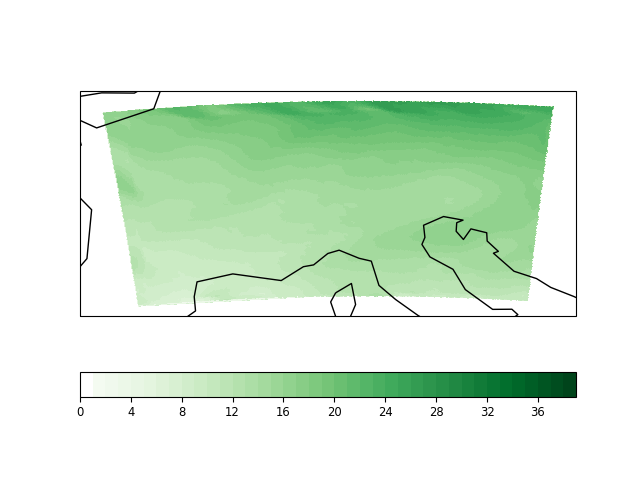

In [18]:
figure1=ds1.psy.plot.mapplot(
     name='wind_abs', 
     xgrid=None, ygrid=None, 
     bounds=list(range(0, 40)),
     cticksize='small',
     cmap='w_Greens', 
     #map_extent=[6.7, 7.0, 46.6, 46.75]
     )

In [17]:
figure1.update(cticksize=20, cticks="rounded", bounds=list(range(0, 40)))

/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


In [ ]:
figure1.plotters[0]

In [ ]:
ds_edge_combi=ds_edge_combi.assign(wind_abs=(ds_edge_combi.VN**2 + ds_edge_combi.VT**2)**0.5)
ds_edge_combi.wind_abs.encoding['coordinates'] += ' elon elat'
normal_edge = xr.concat([ds_edge_combi.zonal_normal_primal_edge, ds_edge_combi.meridional_normal_primal_edge], dim="cart")
normal_edge = normal_edge / np.linalg.norm(normal_edge, axis=0)
ds_edge_combi = ds_edge_combi.assign(zn = ds_edge_combi.zonal_normal_primal_edge / np.sqrt(ds_edge_combi.zonal_normal_primal_edge*ds_edge_combi.zonal_normal_primal_edge + ds_edge_combi.meridional_normal_primal_edge*ds_edge_combi.meridional_normal_primal_edge))
ds_edge_combi = ds_edge_combi.assign(mn = ds_edge_combi.meridional_normal_primal_edge / np.sqrt(ds_edge_combi.zonal_normal_primal_edge*ds_edge_combi.zonal_normal_primal_edge + ds_edge_combi.meridional_normal_primal_edge*ds_edge_combi.meridional_normal_primal_edge))
ds_edge_combi = ds_edge_combi.assign(normal_edge = normal_edge)


In [ ]:
fds_edge = ds_edge_combi.where((ds_edge_combi.coords["elon"] > 0.165) & (ds_edge_combi.coords["elon"] < 0.18) 
                     & (ds_edge_combi.coords["elat"] > 0.8) & (ds_edge_combi.coords["elat"] < 0.81),
                                                                drop=True)


fds_cell = ds_cell_combi.where((ds_cell_combi.coords["clon"] > 0.165) & (ds_cell_combi.coords["clon"] < 0.18) 
                     & (ds_cell_combi.coords["clat"] > 0.8) & (ds_cell_combi.coords["clat"] < 0.81),
                                                                drop=True)
fds_cell

In [ ]:
fds_cell.T.encoding['coordinates'] = 'clon clat'
fds_cell.T

In [ ]:
fds_edge.wind_abs.encoding['coordinates'] = 'elon elat'

fds_edge.psy.plot.mapplot(
     name='wind_abs', 
     xgrid=None, ygrid=None, 
     datagrid=dict(c='k', lw=0.1),
     ax=(2, 1),
     cmap='Reds', 
     #map_extent=[6.7, 7.0, 46.6, 46.75]
     )

In [ ]:
fds2 = ds_cell_combi.where( (ds_cell_combi.coords["clat_bnds"] > 0.802 ).any(dim="vertices") & (ds_cell_combi.coords["clat_bnds"] < 0.802 ).any(dim="vertices"))
                      
                      #(ds_cell_combi.coords["clon"] > 0.165) & (ds_cell_combi.coords["clon"] < 0.18) 
                     #& (ds_cell_combi.coords["clat"] > 0.8) & (ds_cell_combi.coords["clat"] < 0.81),
                     #                                           drop=True)
fds2.T.encoding['coordinates'] = 'clon clat'


In [ ]:
fds2.psy.plot.mapplot(
     name='T', 
     xgrid=None, ygrid=None, 
     datagrid=dict(c='k', lw=0.1),
     ax=(2, 1),
     cmap='Reds', 
     #map_extent=[6.7, 7.0, 46.6, 46.75]
     )


In [71]:
def show_data_vars(ds):
    if type(ds) is str:
        Exception("Argument is not a Dataset. Please open the dataset via psy.open_dataset() and pass returned Dataset to this function.")
    elif type(ds) is xr.core.dataset.Dataset:
        print ("{:<15} {:<32} {:<20} {:<20} {:<10}".format('psyplot name','long_name','GRIB_cfVarName','GRIB_shortName', 'units'))
        for k, v in six.iteritems(ds.data_vars):
            i=ds.data_vars[v.name]
            try:
                long_name= (i.long_name[:28] + '..') if len(i.long_name) > 28 else i.long_name
            except:
                long_name=''
            try:
                standard_name=i.standard_name
            except:
                standard_name=''
            try:
                units=i.units
            except:
                units=''
            try:
                gribcfvarName=i.GRIB_cfVarName
            except:
                gribcfvarName=''
            try:
                gribshortName=i.GRIB_shortName
            except:
                gribshortName=''
            print ("{:<15} {:<32} {:<20} {:<20} {:<10}".format(v.name, long_name, gribcfvarName, gribshortName, units))


In [69]:
show_data_vars(ds1)

psyplot name    long_name                      GRIB_cfVarName       GRIB_shortName       units     
VN              normal wind component          unknown              VN                   m s-1     
VT              tangential wind component      unknown              VT                   m s-1     
wind_abs                                                                                           


In [63]:
f_icon_irr = '../data/example_data/grib/lfff00000000'

ds = psy.open_dataset(f_icon_irr, engine='cfgrib', backend_kwargs={'indexpath': '', 'errors': 'ignore'})
ds

ERROR:cfgrib.messages:skipping corrupted Message
Traceback (most recent call last):
  File "/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cfgrib/messages.py", line 239, in __iter__
    yield self.message_from_file(file, errors=self.errors)
  File "/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cfgrib/messages.py", line 255, in message_from_file
    return self.message_class.from_file(file, offset, **kwargs)
  File "/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cfgrib/messages.py", line 94, in from_file
    codes_id = eccodes.codes_grib_new_from_file(file)
  File "/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/gribapi/gribapi.py", line 411, in grib_new_from_file
    GRIB_CHECK(err)
  File "/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/gribapi/gribapi.py", line 228, in GRIB_CHECK
    errors.raise_grib_error(errid)
  File "/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/gribapi/errors.py", line 382, in raise_grib_er

<xarray.Dataset>
Dimensions:               (values: 1028172, generalVerticalLayer: 80, depthBelowLandLayer: 8, depthBelowLand: 9)
Coordinates: (12/20)
    number                int64 ...
    time                  datetime64[ns] ...
    step                  timedelta64[ns] ...
    surface               float64 ...
    valid_time            datetime64[ns] ...
    isobaricLayer         float64 ...
    ...                    ...
    meanSea               float64 ...
  * depthBelowLandLayer   (depthBelowLandLayer) float64 0.0 0.01 ... 2.43 7.29
    heightAboveGround     float64 ...
    lakeBottom            float64 ...
    entireLake            float64 ...
  * depthBelowLand        (depthBelowLand) float64 0.0 0.005 0.02 ... 4.86 14.58
Dimensions without coordinates: values
Data variables: (12/61)
    snfalb                (values) float32 ...
    lhtfl                 (values) float32 ...
    nlwrf                 (values) float32 ...
    dlwrf                 (values) float32 ...
    ulwrf                 (values) float32 ...
    shtfl                 (values) float32 ...
    ...                    ...
    T_MNW_LK              (values) float32 ...
    sst                   (values) float32 ...
    T_SNOW                (values) float32 ...
    sot                   (depthBelowLand, values) float32 ...
    T_WML_LK              (values) float32 ...
    tp                    (values) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Zurich
    history:                 2022-03-22T17:59 GRIB to CDM+CF via cfgrib-0.9.9...

In [72]:
show_data_vars(ds)

psyplot name    long_name                        GRIB_cfVarName       GRIB_shortName       units     
snfalb          Albedo - diffusive solar (0...   snfalb               ALB_DIF              %         
lhtfl           Latent Heat Net Flux (m)         lhtfl                ALHFL_S              W m-2     
nlwrf           Net long wave radiation flux..   nlwrf                ATHB_S               W m-2     
dlwrf           Downward long-wave radiation..   dlwrf                ATHD_S               W m-2     
ulwrf           Surface upward thermal radia..   ulwrf                ATHU_S               W m-2     
shtfl           Sensible Heat Net Flux (m)       shtfl                ASHFL_S              W m-2     
nswrf           Net short wave radiation flu..   nswrf                ASOB_S               W m-2     
ASWDIFD_S       Downward diffusive short wav..   unknown              ASWDIFD_S            W m-2     
uswrf           Upward diffusive short wave ..   uswrf                ASWDIFU_S   